# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [30]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


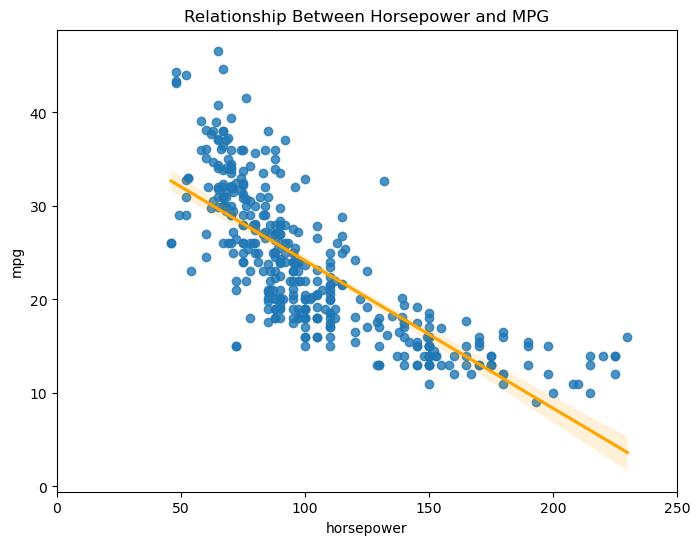

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- The above graph plots the relationship between the slope and RSS, the slope that fits this dataset the best is at the point where the RSS is lowest or the minimum, as RSS is one way to describe error and our goal is to minimize error in a model.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1) 

#### Answer: 

- The step size is the difference in value between iterations in gradient descent. It determines how quickly the model descends on the error curve. The learning rate is the parameter that determines step size


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- A logistic regression model is used for categorical target variables. It predicts the probability that a data point should be in one bin or another(or any one of multiple bins).
- logistic regression is different from linear regression in that: linear regression is estimating the value of a dependent variable, based on changes of independent variables, whereas logistic regression is classifing a target variable into different bins by calculating a probability that they belong in each bin, also based on independent variables.
- logistic regression is a parametric model. uses coefficients, cares about distribution


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- logistic regression is better than a decision tree when the predictor variables are categorical, as you can onehotencode them into seperate columns.
- a decision tree is better suited for a dataset where there are outliers, because it splits data based on feature values, not parametric values


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [10]:
# Train-test split
# Set test_size=0.33 and random_state=42
y = mpg_class['target']
X = mpg_class.drop('target', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [12]:
# Scale the data
scaler = StandardScaler()

In [73]:
x_train_scaled = scaler.fit(X_train)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [15]:
# call_on_students(1)

0    293
1     99
Name: target, dtype: int64

In [ ]:
#It is a very unbalanced dataset meaning the baseline would be far above 50% accuracy.

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

#### Answer:

- it is a very unbalanced dataset, many more 0's than 1's


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- it would have 195 true positives and 67 false positives


#### Part 3: How accurate would that baseline be on test data?


In [23]:
# Code to find the answer
TP= 195
Sample=(195+67)
accuracy = TP/Sample
accuracy

0.7442748091603053

#### Answer:

- .744

### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- we want our baseline model to have about 50% accuracy. Having a baseline with almost 75% accuracy would make it more likely our logistic regression model overfits on the test data. We could undersample, or remove some of the data that are classifyed as 0 in the target column in order to create a more balance dataset.
OVERSAMPLE!! (SMOTE) data set is too small for undersampling

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [74]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
# Instantiate the model
logreg = LogisticRegression(random_state=42)

# Fit the model
model = logreg.fit(X_train_scaled, y_train)



NameError: name 'X_train_scaled' is not defined

In [28]:
y_hat_test = logreg.predict(X_test)

In [31]:
# Plot a confusion matrix on the test data
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[96  2]
 [ 8 24]]


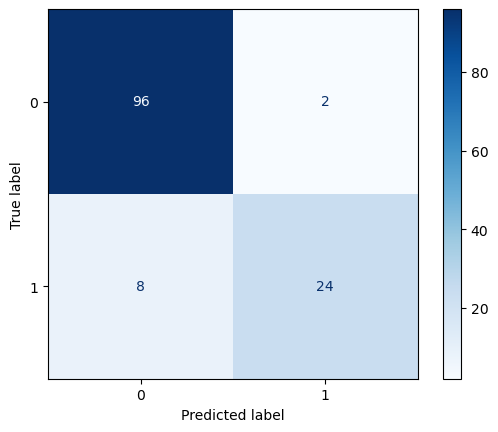

In [34]:
# Import plot_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap=plt.cm.Blues)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [39]:
# Accuracy
acc= 104/(104+26)
acc

0.8

In [40]:
# Precision
prec= 96/(96+8)
prec

0.9230769230769231

In [42]:
# Recall
rec= 96/(96+2)
rec

0.9795918367346939

In [44]:
# F1-Score
F1= (2*prec*rec)/(prec*rec)
F1

2.0

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [47]:
y_prob = model.predict_proba(X_test)
y_prob[:5]

array([[9.99435202e-01, 5.64798031e-04],
       [9.94716991e-01, 5.28300857e-03],
       [9.99990624e-01, 9.37560091e-06],
       [9.99307325e-01, 6.92675205e-04],
       [9.99813030e-01, 1.86970126e-04]])

In [48]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_pred[:5].reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [50]:
# Calculate roc-auc
roc_auc_score(y_test, y_prob[:,1])

0.982780612244898

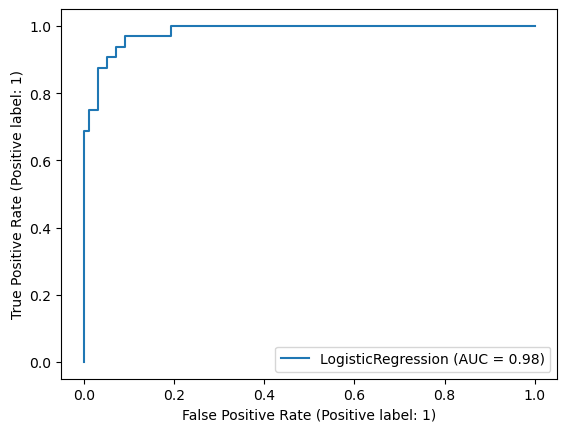

In [52]:
# Plot the ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- it is definitely overfitting due to the imbalance data.


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [53]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

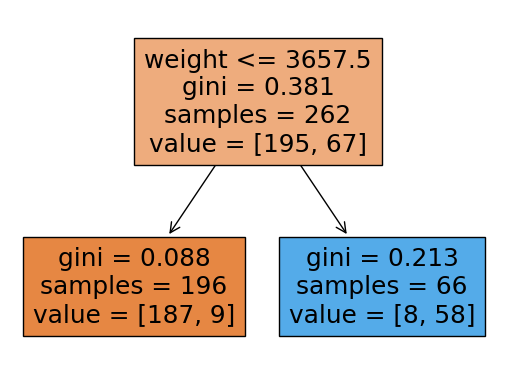

In [54]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

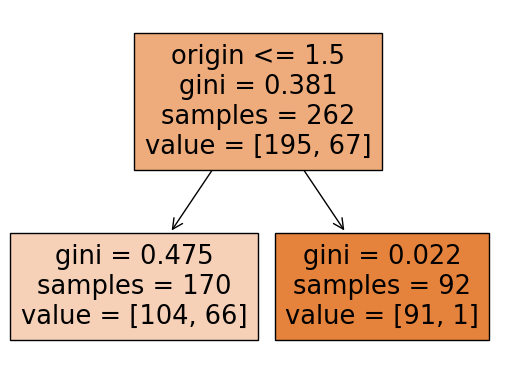

In [55]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- add ginis together, whichever is less (version 1 is better)


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [64]:
# Fit a decision tree model

# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(max_depth=10, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

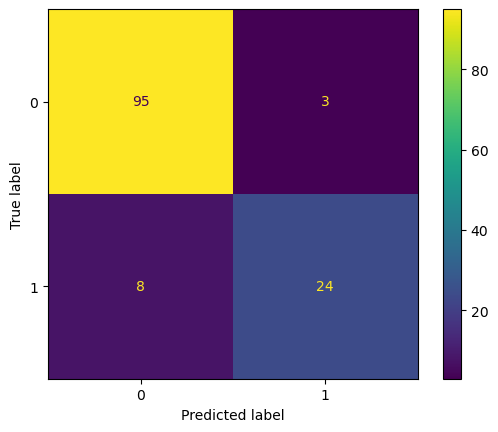

In [65]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test);

/Users/lkimball/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/lkimball/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


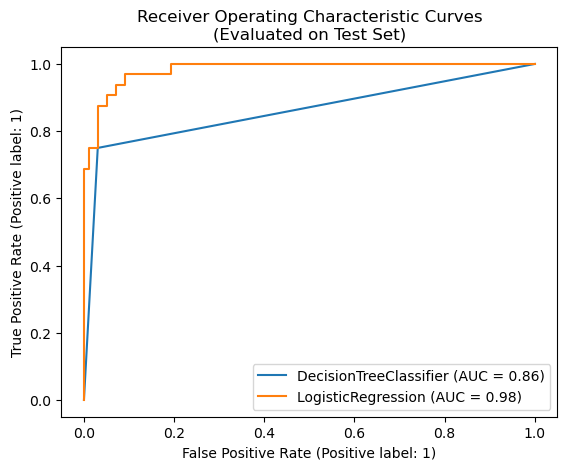

In [66]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- the logistic regression is the better model according to ROC-AUC score. The value is higher and there is more area under the curve for the logistic regression line.
